# ARIMA Forecasting in Stock Market

### What ARIMA Stands For
* **A**uto-**R**egressive **I**ntegrated **M**oving **A**verage
* A series which need to be differenced to be made stationary is an "integrated"(**I**) series, parameter is $d$
* Lags of stationarized series are called "auto-regressive"(**AR**) terms, parameter is $p$
* Lags of the forecast errors are called "moving average(**MA**) terms, parameter is $q$

### $p$, $d$, $q$ Parameters in ARIMA Model

* $p$: Number of AR (Auto-Regressive) terms, a stochastic process where future values are dependent on past values signifying that past values have a linear effect on the future values. For instance if $p=5$, the predictors for $x(t)$ will be $x(t-1)$….$x(t-5)$.
* $d$: Number of times that the raw observations are differenced, when differencing is done to make a process stationary, we include the differenced value(i.e. if we took the first difference it would be $I(d=1)$)
* $q$: Number of MA (Moving Average) terms, a prcoess where the current value is linearly regressed on current and past white noise terms (residuals). For instance if $q=5$, the predictors for $x(t)$ will be $e(t-1)$….$e(t-5)$ where $e(i)$ is the difference between the moving average at $ith$ instant and actual value. 

### General Process for ARIMA Models
* Visualize the Time Series Data
* Make the time series data stationary 
* Plot the Correlation and AutoCorrelation Charts to determin the parameter $p$, $q$
* Construct the ARIMA Model
* Use the model to make predictions

## Reference
- [Forecasting Stock Returns using ARIMA model](https://www.r-bloggers.com/forecasting-stock-returns-using-arima-model/)
- [A comprehensive beginner’s guide to create a Time Series Forecast (with Codes in Python)](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)
- [A Complete Tutorial on Time Series Modeling in R](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)
- [Statistical forecasting:notes on regression and time series analysis](http://people.duke.edu/~rnau/411home.htm)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## Read .csv File for 5 Years Stock Market Data

In [2]:
SandP500_all_stocks = pd.read_csv('../Dataset/all_stocks_5yr.csv', index_col='Date')
SandP500_all_stocks.index = pd.to_datetime(SandP500_all_stocks.index)
SandP500_all_stocks.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 606801 entries, 2012-08-13 to 2017-08-11
Data columns (total 6 columns):
Open      606417 non-null float64
High      606593 non-null float64
Low       606574 non-null float64
Close     606801 non-null float64
Volume    606395 non-null float64
Name      606801 non-null object
dtypes: float64(5), object(1)
memory usage: 32.4+ MB


In [3]:
SandP500_all_stocks.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM


## Select Stock Price for 10 Companies

In [4]:
## 10 Selected Stock List
stock_list = ["AAPL", "FB", "AMZN", 'GOOGL', 'GOOG', 'NVDA', 'IBM', 'MSFT', 'INTC', 'MU']

## Use loop to select data
for temp in stock_list:
    ## conditional selection
    temp_stock_data = SandP500_all_stocks[SandP500_all_stocks['Name'] == temp] 
    if temp == stock_list[0]:
        stock_price_selected = temp_stock_data
    else:      
        stock_price_selected = stock_price_selected.append(temp_stock_data)

stock_price_selected.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2012-08-13,89.06,90.00,89.04,90.00,69707463.0,AAPL
2012-08-14,90.27,91.23,90.03,90.24,85041824.0,AAPL
2012-08-15,90.19,90.57,89.68,90.12,64377278.0,AAPL
2012-08-16,90.17,90.97,90.07,90.91,63694204.0,AAPL
2012-08-17,91.43,92.60,91.26,92.59,110689894.0,AAPL


In [5]:
## reshape the data by pivot function
close_pivot_data = pd.pivot_table(stock_price_selected, values="Close", 
                                 columns = "Name", index="Date")
volume_pivot_data = pd.pivot_table(stock_price_selected, values="Volume", 
                                 columns = "Name", index="Date")
open_pivot_data = pd.pivot_table(stock_price_selected, values="Open", 
                                 columns = "Name", index="Date")
high_pivot_data = pd.pivot_table(stock_price_selected, values="High", 
                                 columns = "Name", index="Date")
low_pivot_data = pd.pivot_table(stock_price_selected, values="Low", 
                                 columns = "Name", index="Date")

In [6]:
close_pivot_data.head()

Name,AAPL,AMZN,FB,GOOG,GOOGL,IBM,INTC,MSFT,MU,NVDA
Date,,,,,,,,,,
2012-08-13,90.00,232.44,21.60,329.67,330.34,199.01,26.69,30.39,6.72,14.81
2012-08-14,90.24,233.19,20.38,334.00,334.66,198.29,26.48,30.13,6.55,14.59
2012-08-15,90.12,237.42,21.20,333.44,334.10,198.40,26.27,30.20,6.49,14.48
2012-08-16,90.91,241.55,19.87,336.10,336.77,200.84,26.59,30.78,6.61,14.78
2012-08-17,92.59,241.17,19.05,338.23,338.91,201.22,26.33,30.90,6.57,14.65


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001788D580C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001788D4DF208>]], dtype=object)

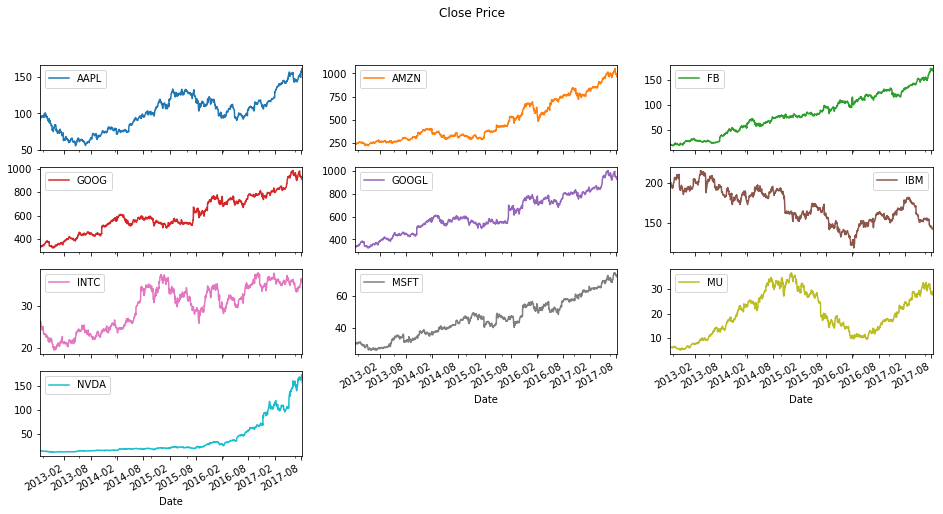

In [7]:
close_pivot_data.plot(subplots=True, figsize=(16, 8), layout=(4, 3), title ="Close Price", sharex=True)

## Testing for Stationarity
### Method 1：Plotting Rolling Statistics
Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:
- constant mean
- constant variance
- an autocovariance that does not depend on time.  

We can plot the moving average or moving variance and see if it varies with time.

### Method 2：Applying ADF for Unit Root Test
We can use the [Augmented Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

Two ways to justify the ADF result
- The **p-value** resulting from the ADF test has to be less than 0.05 for a time series to be stationary. If the p-value is greater than 0.05, you conclude that the time series has a unit root which means that it is a non-stationary process.

- The test results comprise of a **Test Statistic** and some **Critical Values** for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary

In [8]:
from statsmodels.tsa.stattools import adfuller

def stationary_test(ts, rolling_window):
    """
    Pass in a time series, returns rolling statistic plot & ADF report
    """
    # Method1:plotting rolling statistics
    ts_rolmean = ts.rolling(window = rolling_window, center=False).mean()
    ts_rolstd = ts.rolling(window = rolling_window, center=False).std()
    
      
    # Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(ts_rolmean, color='red', label='Rolling Mean')
    std = plt.plot(ts_rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('%s Close Price Rolling Mean & Standard Deviation'%ts.name)
    

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    ax1.plot(ts_rolmean)
    ax1.set_title('%s Close Price Rooling Mean'%ts.name)
    ax2.plot(ts_rolstd)
    ax2.set_title('%s Close Price Rooling Standard Deviation'%ts.name)
    plt.show(block=False)
    
    
    # Method 2:applying Augmented Dickey-Fuller Test
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(ts,  regression='c', autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    if dftest[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")



C:\Users\oldan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Choose Apple Stock Close Price for Example

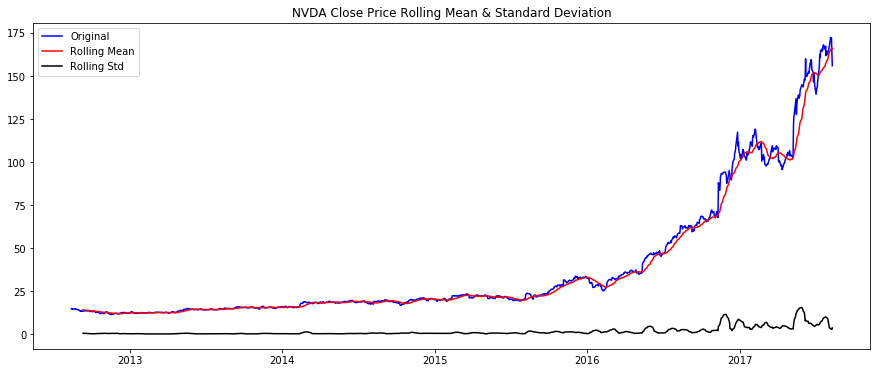

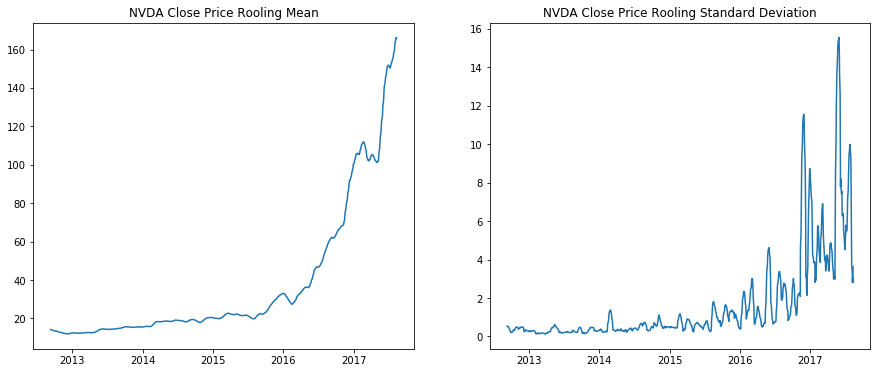

Results of Augmented Dickey-Fuller Test:
Test Statistic                    2.941131
p-value                           1.000000
#Lags Used                       11.000000
Number of Observations Used    1246.000000
Critical Value (1%)              -3.435609
Critical Value (5%)              -2.863862
Critical Value (10%)             -2.568006
dtype: float64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [9]:
ts = close_pivot_data['NVDA']
stationary_test(ts, 20)

## Autocorrelation and Partial Autocorrelation Plots

### Identifying the $p$ and $q$ order for AR and MA model

* For AR models, the ACF will dampen exponentially and the PACF will be used to identify the order $p$ of the AR model. If we have one significant spike at lag 1 on the PACF, then we have an AR model of the order 1, i.e. AR(1). If we have significant spikes at lag 1, 2, and 3 on the PACF, then we have an AR model of the order 3, i.e. AR(3).
    
    
* For MA models, the PACF will dampen exponentially and the ACF plot will be used to identify the order $q$ of the MA process. If we have one significant spike at lag 1 on the ACF, then we have an MA model of the order 1, i.e. MA(1). If we have significant spikes at lag 1, 2, and 3 on the ACF, then we have an MA model of the order 3, i.e. MA(3).

In [10]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [11]:
def acf_pacf_plot(ts, acf_nlags, pacf_nlags, pacf_method='ols'):
    lag_acf = acf(ts, nlags=acf_nlags)
    lag_pacf = pacf(ts, nlags=pacf_nlags, method=pacf_method)
   
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
    plt.title('%s Autocorrelation Function'%ts.name)

    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
    plt.title('%s Partial Autocorrelation Function'%ts.name)   
    plt.tight_layout()
    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    fig = plot_acf(ts, lags=acf_nlags, ax=ax1)
    ax2 = fig.add_subplot(122)
    fig = plot_pacf(ts, lags=pacf_nlags, ax=ax2)

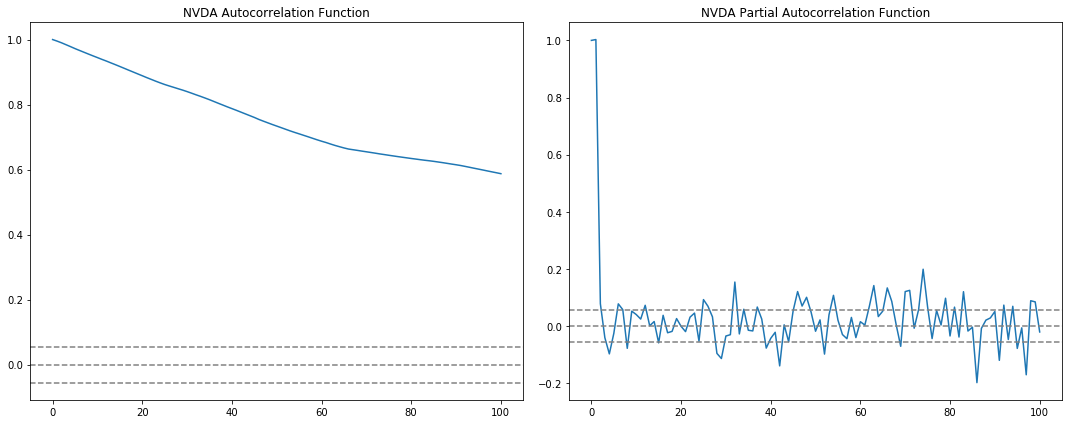

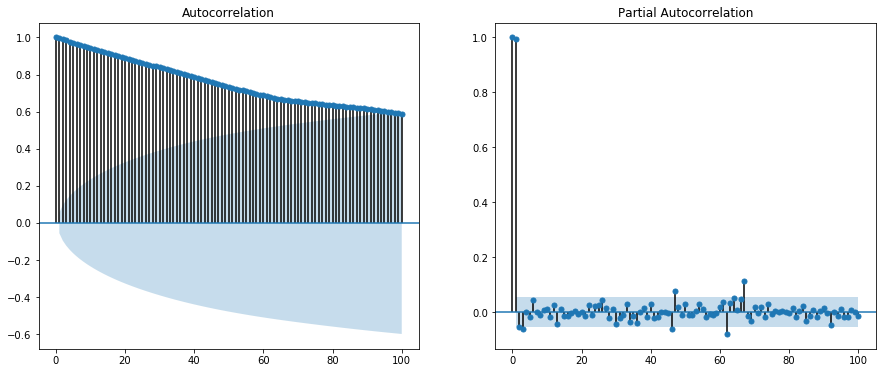

In [12]:
acf_pacf_plot(ts, 100, 100)

## Difference Apple Stock Price to Check Stationarity

In [13]:
# log transformation on stock price
ts_log = np.log(ts)
a = ts_log.name
ts_log.name = '%s log'%a
ts_log = pd.DataFrame(ts_log)
ts_log.head()

,NVDA log
Date,
2012-08-13,2.695303
2012-08-14,2.680336
2012-08-15,2.672768
2012-08-16,2.693275
2012-08-17,2.684440


In [14]:
b = ts_log.columns[0]
ts_log['%s 1st difference'%b] = ts_log - ts_log.shift(1)
ts_log.head()

,NVDA log,NVDA log 1st difference
Date,,
2012-08-13,2.695303,NaN
2012-08-14,2.680336,-0.014966
2012-08-15,2.672768,-0.007568
2012-08-16,2.693275,0.020507
2012-08-17,2.684440,-0.008835


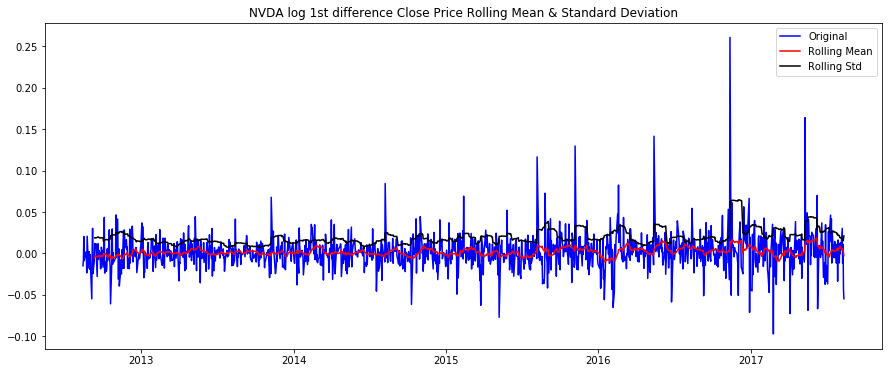

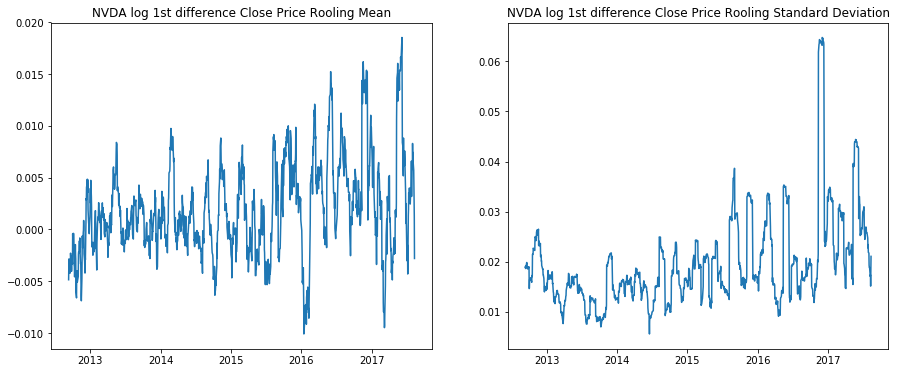

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -36.616364
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1256.000000
Critical Value (1%)              -3.435567
Critical Value (5%)              -2.863844
Critical Value (10%)             -2.567997
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [15]:
stationary_test(ts_log[ts_log.columns[1]].dropna(), 20)
#ts['1st difference'].dropna()

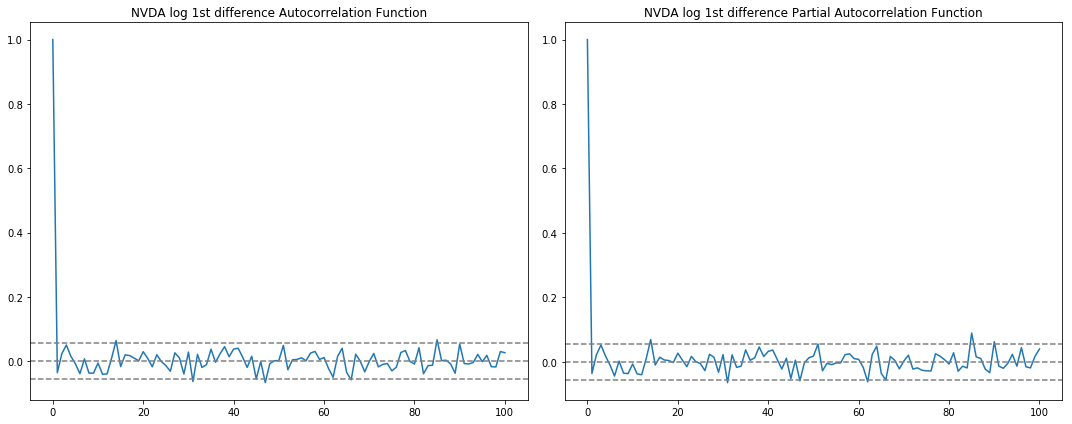

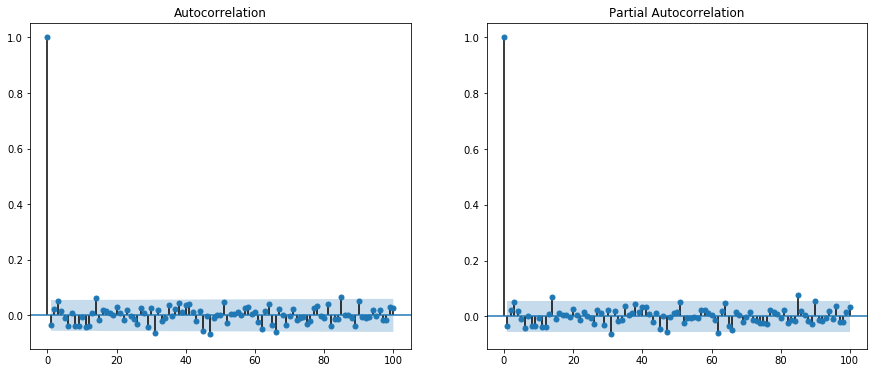

In [16]:
acf_pacf_plot(ts_log[ts_log.columns[1]].dropna(), 100, 100)

No significant peak in ACF & PACF, choose $p=0$, $q=0$ for ARIMA model which indicate the model is white noise. 

## ARIMA Model

In [17]:
from statsmodels.tsa.arima_model import ARIMA

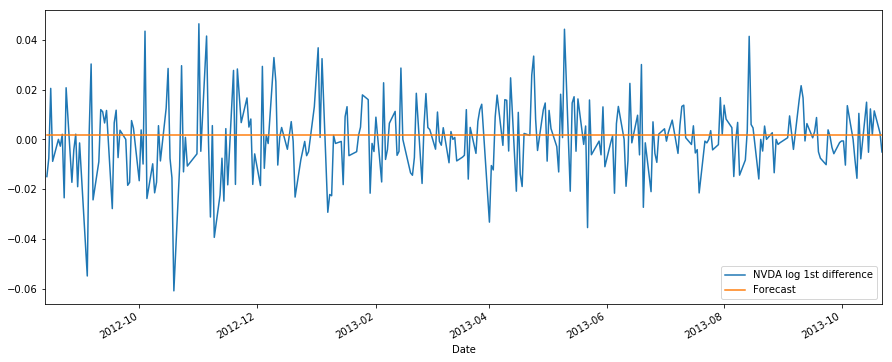

In [29]:
model = ARIMA(ts_log[ts_log.columns[0]], order=(0, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
ts_log['Forecast'] = results_ARIMA.fittedvalues  
ts_log[[ts_log.columns[1], 'Forecast']].iloc[:300].plot()  

In [27]:
ts_log[:20]

,NVDA log,NVDA log 1st difference,Forecast
Date,,,
2012-08-13,2.695303,NaN,NaN
2012-08-14,2.680336,-0.014966,0.001873
2012-08-15,2.672768,-0.007568,0.001873
2012-08-16,2.693275,0.020507,0.001873
2012-08-17,2.684440,-0.008835,0.001873
2012-08-20,2.684440,0.000000,0.001873
2012-08-21,2.681706,-0.002734,0.001873
2012-08-22,2.683758,0.002051,0.001873
2012-08-23,2.660260,-0.023498,0.001873


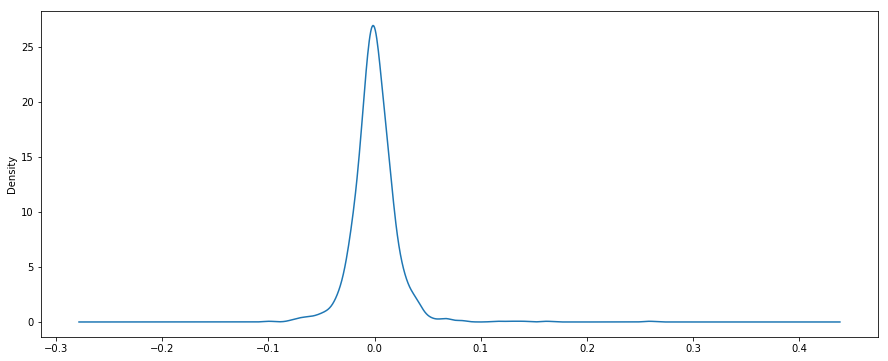

In [35]:
results_ARIMA.resid.plot(kind='kde')

In [37]:
print(results_ARIMA.summary())

IndexError: list index out of range